In [21]:
# Import Required Libraries

import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score

In [22]:
# Prepare your text data

documents = [
    "Latent semantic analysis is a technique in natural language processing.",
    "It is used to discover hidden patterns in a set of documents.",
    "LSA can be applied to various text analysis tasks, such as information retrieval and document classification.",
    "This is a sample document for demonstrating LSA in Python."
]

In [23]:
# Tokenize the documents

nltk.download('punkt')
tokenized_documents = [nltk.word_tokenize(doc) for doc in documents]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yuva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
# Create TF-IDF Vectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_matrix

<4x37 sparse matrix of type '<class 'numpy.float64'>'
	with 45 stored elements in Compressed Sparse Row format>

### Determine the optimal number of topics
Elbow Method and the Silhouette Score to determine the optimal number of topics.

#### 1. Elbow Method

This method involves running LSA for a range of topic numbers and plotting the 
explained variance against the number of topics. The point where the curve starts to level off is 
often considered the optimal number of topics.

In [25]:
explained_variances = []
topic_range = range(1, 11)  # Define a range of possible topic numbers

for num_topics in topic_range:
    lsa = TruncatedSVD(n_components=num_topics)
    lsa_matrix = lsa.fit_transform(tfidf_matrix)
    explained_variance = lsa.explained_variance_ratio_.sum()
    explained_variances.append(explained_variance)

print("Explained Variance :\n", explained_variances)

Explained Variance :
 [0.003986336535826005, 0.3568678032307735, 0.6875587094470117, 1.0000000000000004, 1.0, 1.0000000000000002, 1.0000000000000007, 1.0, 1.0, 1.0]


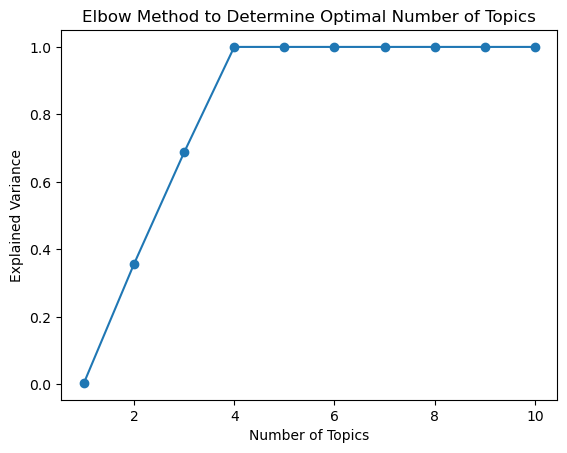

In [29]:
# Plot the explained variances
plt.plot(topic_range, explained_variances, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Explained Variance")
plt.title("Elbow Method to Determine Optimal Number of Topics")
plt.show()

Therefore,

By using Elbow Method, the optimum number of topics in a given topic is 4.

#### 2. Silhoutte Method
The Silhouette Score measures how similar each document is to its own cluster (cohesion) compared to
other clusters (separation). You can use this score to find the number of topics that maximizes the similarity 
within clusters and minimizes the similarity between clusters.

In [31]:
silhouette_scores = []
num_topics_range = range(2, min(len(documents), len(tfidf_vectorizer.get_feature_names_out())))
for num_topics in num_topics_range:
    lsa = TruncatedSVD(n_components=num_topics)
    lsa_matrix = lsa.fit_transform(tfidf_matrix)
    labels = lsa_matrix.argmax(axis=1)
    silhouette_avg = silhouette_score(lsa_matrix, labels)
    silhouette_scores.append(silhouette_avg)

print(silhouette_scores)

[0.2896205715612709, -0.04899784893599043]


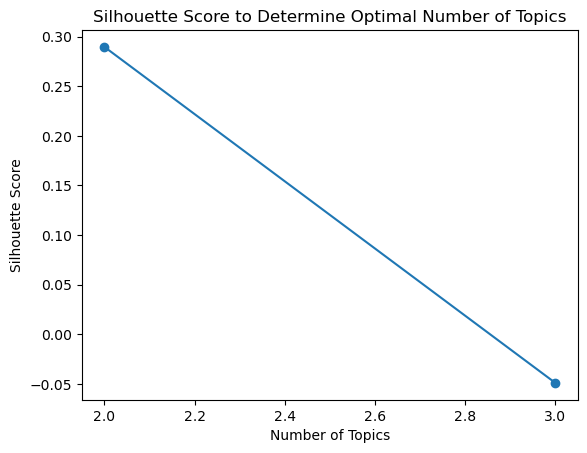

In [32]:
# Plot the Silhouette Scores
plt.plot(num_topics_range, silhouette_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score to Determine Optimal Number of Topics")
plt.show()

The maximum silhouette score occurs at 2.
Therefore optimum number of topics is 2.